## Prediction of salary whether a person earn salary greater than 50000 dollar or not using XGBOOST


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_test=pd.read_csv("adult_test.test",skiprows=1)
df_train=pd.read_csv("adult_train.data")
df_train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex','capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [4]:
df_train.columns=col_labels
df_test.columns=col_labels

In [5]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


## Data preprocessing

In [7]:
df_train.columns   #checking index of  columns present in dataset

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [8]:
df_test.columns    #checking index of columns  present in dataset

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [9]:
df_train.shape  #number of rws and column present in dataset

(32560, 15)

In [10]:
df_test.shape   #number of rws and column present in dataset

(16280, 15)

In [11]:
print(df_train.isnull().values.any())  #is there any null value present in dataset or not if true null value is present else not
print(df_test.isnull().values.any())

False
False


In [12]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [13]:
df_test.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [14]:
#extracting all those columns having categorical columns
cat_list=[]
def cat_features(data):
    cat_list=[]
    for i in data.columns:
        if data[i].dtypes=="object":
            cat_list.append(i)
    else:
        pass
    return cat_list
cat1=cat_features(df_train)
cat2=cat_features(df_test)
print(cat1)
print(cat2)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'wage_class']
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'wage_class']


# Feature Encoding

In [15]:
cat_train=df_train.loc[:,cat1]
cat_train.head()
####-----------------------------------------------------------------------------------------------------------------------
cat_test=df_test.loc[:,cat2]
cat_test.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K.
1,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K.
2,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K.
3,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K.
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K.


In [16]:
#checking all the unique value present in each categorical columns
dicts={}
for i in cat_train.columns:
        dicts[i]=len(cat_train[i].unique())
dicts

{'workclass': 9,
 'education': 16,
 'marital_status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'native_country': 42,
 'wage_class': 2}

#### Above output represent each features  with number of unique value present in it

Here we can do encoding easily for features like workclass,marital_status,relationship,race,sex,wage_class al these featres have less categorical features but;
education,occupation,native_country all these features has very large vcategorical variable so for these kind of features if we apply normal encoding tecnique it will be resulted into curse of dimensionality hence we need to avoid inbuilt encoding and have to do alaternative of it

### 1. Feature encoding for ordinal categorical variable

#### for low dimensional ordinal features features

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def ordinal_encoder1(data,col):
    encoder=[i for i in le.fit_transform(data[col].unique())]  #converting encoded value into list 
    data=[str(x) for x in data[col].unique()]                  #converting unique value into list from index
    x=zip(data,encoder)
    return dict(x)
workclass=ordinal_encoder1(cat_train,"workclass")
wage_class=ordinal_encoder1(cat_train,"wage_class")
sex=ordinal_encoder1(cat_train,"sex")
####----------------------------------------------------------------------------------------------------------------------------
workclass1=ordinal_encoder1(cat_test,"workclass")
wage_class1=ordinal_encoder1(cat_test,"wage_class")
sex1=ordinal_encoder1(cat_test,"sex")
####----------------------------------------------------------------------------------------------------------------------------
print(workclass,"\n","*"*125)
print(wage_class,"\n","*"*125)
print(sex)

               

{' Self-emp-not-inc': 6, ' Private': 4, ' State-gov': 7, ' Federal-gov': 1, ' Local-gov': 2, ' ?': 0, ' Self-emp-inc': 5, ' Without-pay': 8, ' Never-worked': 3} 
 *****************************************************************************************************************************
{' <=50K': 0, ' >50K': 1} 
 *****************************************************************************************************************************
{' Male': 1, ' Female': 0}


In [18]:
#Adding these encoded data into df_train and removing their non_encoded features
cat_train["workclass"]=cat_train["workclass"].map(workclass )
cat_train["wage_class"]=cat_train["wage_class"].map(wage_class)
cat_train["sex"]=cat_train["sex"].map(sex)
cat_train.head()
####----------------------------------------------------------------------------------------------------------------------------
cat_test["workclass"]=cat_test["workclass"].map(workclass1)
cat_test["wage_class"]=cat_test["wage_class"].map(wage_class1)
cat_test["sex"]=cat_test["sex"].map(sex1)
cat_test.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,4,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,United-States,0
1,2,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,1,United-States,1
2,4,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,United-States,1
3,0,Some-college,Never-married,?,Own-child,White,0,United-States,0
4,4,10th,Never-married,Other-service,Not-in-family,White,1,United-States,0


#### For high dimensional ordinal features

In [19]:
#here i will be going to do probability ration encoding
def ordinal_encoding2(data,cols):
    col_success=data.groupby([cols])["sex"].mean()
    col_failure=1-col_success
    prob_ratio=col_success/col_failure
    prob_dict=prob_ratio.to_dict()
    return prob_dict
education=ordinal_encoding2(cat_train,"education")
occupation=ordinal_encoding2(cat_train,"occupation")
print(education)

####----------------------------------------------------------------------------------------------------------------------------

education1=ordinal_encoding2(cat_test,"education")
occupation1=ordinal_encoding2(cat_test,"occupation")



{' 10th': 2.1627118644067793, ' 11th': 1.7199074074074077, ' 12th': 2.0069444444444446, ' 1st-4th': 2.652173913043478, ' 5th-6th': 2.964285714285715, ' 7th-8th': 3.0375000000000005, ' 9th': 2.569444444444444, ' Assoc-acdm': 1.5344418052256532, ' Assoc-voc': 1.764, ' Bachelors': 2.3069796170475603, ' Doctorate': 3.80232558139535, ' HS-grad': 2.0976401179941, ' Masters': 2.21455223880597, ' Preschool': 2.1875, ' Prof-school': 5.260869565217392, ' Some-college': 1.5983606557377046}


In [20]:
cat_train["education"]=cat_train["education"].map(education)
cat_train["occupation"]=cat_train["occupation"].map(occupation)
####----------------------------------------------------------------------------------------------------------------------------
cat_test["education"]=cat_test["education"].map(education1)
cat_test["occupation"]=cat_test["occupation"].map(occupation1)

## 2.Feature encoding for nominal categorical variable

#### for nominal categorical encoding i will be going with mean encoding

In [21]:
def nominal_encoding(data,cols):
    cols=data.groupby(cols)["sex"].mean()
    dict1=cols.to_dict()
    return dict1
native_country=nominal_encoding(cat_train,"native_country")
marital_status=nominal_encoding(cat_train,"marital_status")
relationship=nominal_encoding(cat_train,"relationship")
race=nominal_encoding(cat_train,"race")
####----------------------------------------------------------------------------------------------------------------------------
native_country1=nominal_encoding(cat_test,"native_country")
marital_status1=nominal_encoding(cat_test,"marital_status")
relationship1=nominal_encoding(cat_test,"relationship")
race1=nominal_encoding(cat_test,"race")


In [22]:
cat_train["native_country"]=cat_train["native_country"].map(native_country)
cat_train["marital_status"]=cat_train["marital_status"].map(marital_status)
cat_train["relationship"]=cat_train["relationship"].map(relationship)
cat_train["race"]=cat_train["race"].map(race)
####----------------------------------------------------------------------------------------------------------------------------
cat_test["native_country"]=cat_test["native_country"].map(native_country1)
cat_test["marital_status"]=cat_test["marital_status"].map(marital_status1)
cat_test["relationship"]=cat_test["relationship"].map(relationship1)
cat_test["race"]=cat_test["race"].map(race1)



In [23]:
cat_train.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,6,2.306980,0.889356,2.508197,0.999924,0.689304,1,0.668072,0
1,4,2.097640,0.398605,7.353659,0.533357,0.689304,1,0.668072,0
2,4,1.719907,0.889356,7.353659,0.999924,0.502241,1,0.668072,0
3,4,2.306980,0.889356,1.732673,0.001276,0.502241,0,0.578947,0
4,4,2.214552,0.889356,2.508197,0.001276,0.689304,0,0.668072,0


Now i am succesfully able to encode the categorical variable into numerical variable


In [24]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Final Encoded train set

In [25]:
#removing categorical feature and concatenating the encoded version of that numerical feature into original dataset
df_train1=df_train.drop(["workclass","education","marital_status","occupation","relationship","race","sex","native_country","wage_class"],axis=1)

In [26]:
df_train1=pd.concat([df_train1,cat_train],axis=1)
df_train1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,50,83311,13,0,0,13,6,2.306980,0.889356,2.508197,0.999924,0.689304,1,0.668072,0
1,38,215646,9,0,0,40,4,2.097640,0.398605,7.353659,0.533357,0.689304,1,0.668072,0
2,53,234721,7,0,0,40,4,1.719907,0.889356,7.353659,0.999924,0.502241,1,0.668072,0
3,28,338409,13,0,0,40,4,2.306980,0.889356,1.732673,0.001276,0.502241,0,0.578947,0
4,37,284582,14,0,0,40,4,2.214552,0.889356,2.508197,0.001276,0.689304,0,0.668072,0


## Fina Encoded test set

In [27]:
#As train and test both dataset having aimilarity in all aspect hence encoding test set now
df_test1=df_test.drop(["workclass","education","marital_status","occupation","relationship","race","sex","native_country","wage_class"],axis=1)


In [28]:
df_test1=pd.concat([df_test1,cat_test],axis=1)
df_test1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,38,89814,9,0,0,50,4,2.094903,0.888829,15.533333,1.000000,0.685573,1,0.663938,0
1,28,336951,12,0,0,40,2,1.592233,0.888829,6.260870,1.000000,0.685573,1,0.663938,1
2,44,160323,10,7688,0,40,4,1.614431,0.888829,3.011811,1.000000,0.517308,1,0.663938,1
3,18,103497,10,0,0,30,0,1.614431,0.548868,1.236111,0.549761,0.685573,0,0.663938,0
4,34,198693,6,0,0,30,4,1.814815,0.548868,0.812918,0.533661,0.685573,1,0.663938,0


## Data Visualization

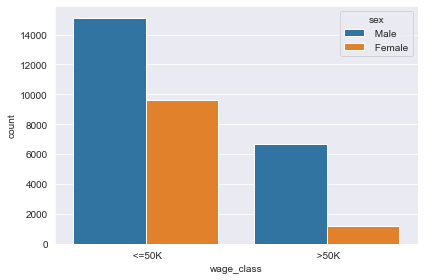

In [29]:
sns.set_style("darkgrid")
sns.countplot("wage_class",data=df_train,hue="sex")
plt.tight_layout()

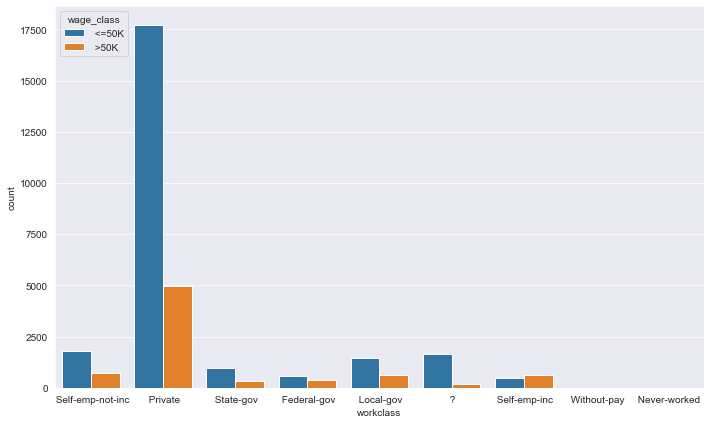

In [30]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.countplot("workclass",data=df_train,hue="wage_class")
plt.tight_layout()

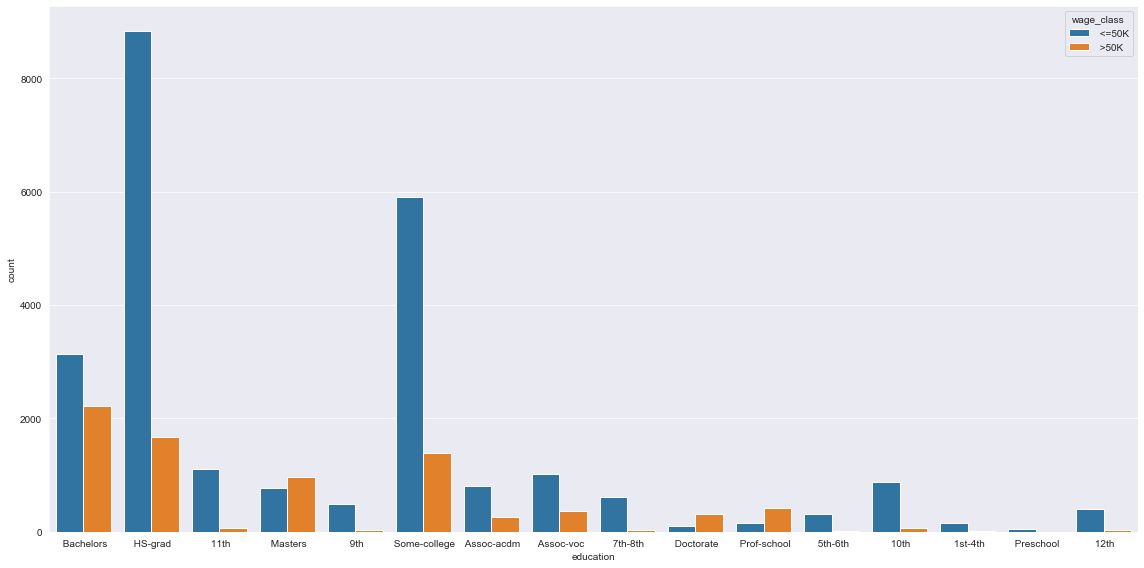

In [31]:
plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
sns.countplot("education",data=df_train,hue="wage_class",orient="h")
plt.tight_layout()

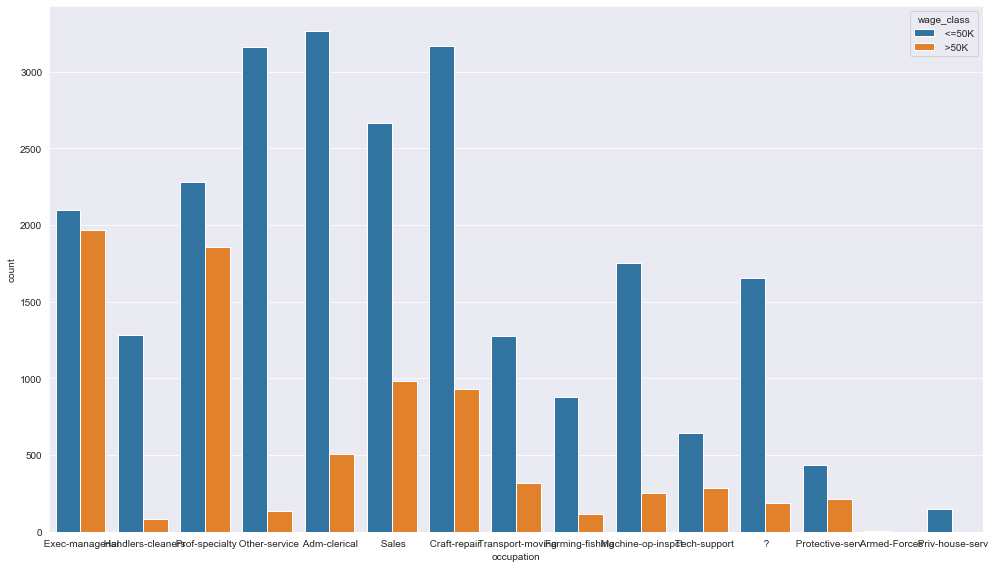

In [32]:
plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
sns.countplot("occupation",data=df_train,hue="wage_class")
plt.tight_layout()

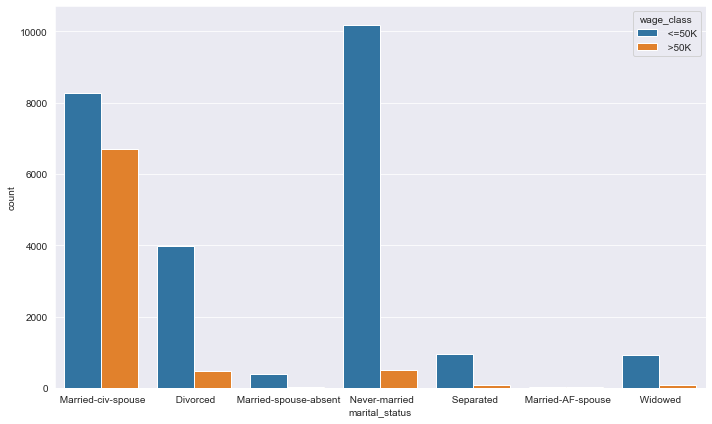

In [33]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.countplot("marital_status",data=df_train,hue="wage_class")
plt.tight_layout()

## 3. Pre Modeling Steps

In [34]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train=df_train1.iloc[:,:-1]
y_train=df_train1.iloc[:,-1]
print(x_train.shape)
print(y_train.shape)
x_train.columns


(32560, 14)
(32560,)


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass', 'education', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [35]:
x_test=df_test1.iloc[:,:-1]
y_test=df_test1.iloc[:,-1]
print(x_test.shape)
print(y_test.shape)

(16280, 14)
(16280,)


In [36]:
x_test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,38,89814,9,0,0,50,4,2.094903,0.888829,15.533333,1.000000,0.685573,1,0.663938
1,28,336951,12,0,0,40,2,1.592233,0.888829,6.260870,1.000000,0.685573,1,0.663938
2,44,160323,10,7688,0,40,4,1.614431,0.888829,3.011811,1.000000,0.517308,1,0.663938
3,18,103497,10,0,0,30,0,1.614431,0.548868,1.236111,0.549761,0.685573,0,0.663938
4,34,198693,6,0,0,30,4,1.814815,0.548868,0.812918,0.533661,0.685573,1,0.663938


## 4. M.L  Modeling 

In [37]:
from xgboost import XGBClassifier

In [38]:
param_grid={"max_depth":2,
            "learning_rate":1,
            "objective":"binary:hinge",
            "n_estimators":26
           }
param_grid["eval_metric"]=["logloss","auc"]

In [39]:
clf=XGBClassifier(**param_grid)
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [40]:
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
y_predict

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [41]:
Y_predict_probab=clf.predict_proba(x_test)  #for roc _curve plotting we need probabilistic output
Y_predict_probab

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

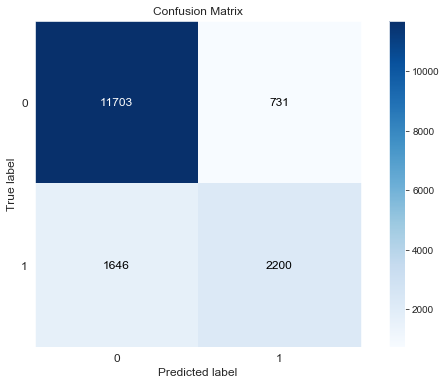

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
import scikitplot as splt
ax=splt.metrics.plot_confusion_matrix(y_test,y_predict,text_fontsize="large",figsize=(10,6))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()



In [43]:
report=classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12434
           1       0.75      0.57      0.65      3846

    accuracy                           0.85     16280
   macro avg       0.81      0.76      0.78     16280
weighted avg       0.85      0.85      0.85     16280



In [44]:
accuracy_score(y_test,y_predict)

0.853992628992629

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


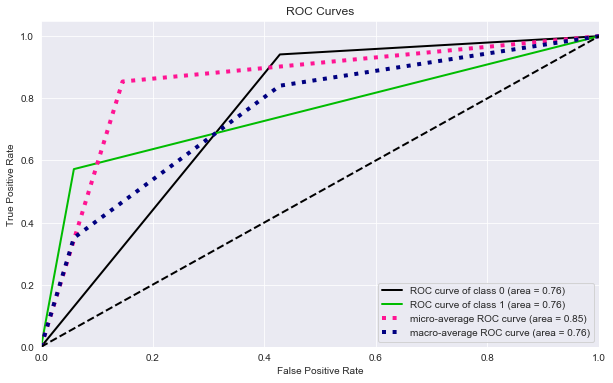

In [46]:
from sklearn import metrics
splt.metrics.plot_roc_curve(y_test,Y_predict_probab,figsize=(10,6))

In [54]:
final_df=pd.DataFrame({"Actual":y_test,"predicted":y_predict})
final_df.head(21)

,Actual,predicted
0,0,0
1,1,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1
